In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
densenet_metrics = {"chest": {"Accuracy": 87.7964, "mAP": 16.51104}, "colon": {"Accuracy": 87.075241, "mAP": 93.323318}, "endo": {"Accuracy": 84.336, "mAP": 16.709507}}

In [3]:
def evaluate(task):
    result_folder = [i for i in os.listdir(f"output/base2new/train_base/medfmc_{task}/") if i[:5] == "shots"]
    
    print(len(result_folder))
    
    acc_dict = {"1": [], "5": [], "10": []}
    map_dict = {"1": [], "5": [], "10": []}
    
    for folder in result_folder:
        with open(f"output/base2new/train_base/medfmc_{task}/{folder}/CoCoOp/vit_b16_c4_ep10_batch1_ctxv1/seed1/log.txt", "r") as file:
            data = file.readlines()
        print(folder, data[-5], data[-2])
        
        acc_dict[folder.split("_")[1]].append(float( data[-5].strip("%\n").split(" ")[-1] ))
        
        mAP = float( data[-2].strip("%\n").split(" ")[-1] )
#         if mAP < 1:
#             mAP = 100
        
        map_dict[folder.split("_")[1]].append(mAP)
        
    for shot in ["1", "5", "10"]:
        acc_dict[shot] = np.mean(acc_dict[shot])
        map_dict[shot] = np.mean(map_dict[shot])
    
    print(acc_dict)
    print(map_dict)
    
    df_acc = pd.DataFrame({"Shots": acc_dict.keys(), "Accuracy (%)": acc_dict.values()})
    df_map = pd.DataFrame({"Shots": map_dict.keys(), "mAP (%)": map_dict.values()})
    
    plt.figure(figsize=(15,8))
    ax = sns.lineplot(data=df_acc, x='Shots', y="Accuracy (%)", label="CoCoOp Few Shot Learning")
    plt.axhline(densenet_metrics[task]["Accuracy"], label="Densenet Transfer Learning", color="orange")
    plt.title(f"Metrics over epochs -- {task.upper()}") # , fontsize=
    plt.xlabel('Shots')
    plt.ylabel(f"Accuracy (%)")
    ax.legend()
    
    
    
    plt.figure(figsize=(15,8))
    ax = sns.lineplot(data=df_map, x='Shots', y="mAP (%)", label="CoCoOp Few Shot Learning")
    if densenet_metrics[task]["mAP"] != None:
        plt.axhline(densenet_metrics[task]["mAP"], label="Densenet Transfer Learning", color="orange")
    plt.title(f"Metrics over epochs -- {task.upper()}") # , fontsize=
    plt.xlabel('Shots')
    plt.ylabel(f"mAP (%)")
    ax.legend()
        
#         break

57
shots_1_target_pleural_effusion * accuracy: 63.0%
 * mAP: 36.9%

shots_5_target_pleural_effusion * accuracy: 63.7%
 * mAP: 38.3%

shots_10_target_pleural_effusion * accuracy: 59.3%
 * mAP: 37.0%

shots_1_target_nodule * accuracy: 82.9%
 * mAP: 17.1%

shots_5_target_nodule * accuracy: 82.9%
 * mAP: 17.1%

shots_1_target_pneumonia * accuracy: 74.3%
 * mAP: 23.6%

shots_5_target_pneumonia * accuracy: 76.5%
 * mAP: 23.5%

shots_10_target_pneumonia * accuracy: 76.5%
 * mAP: 23.5%

shots_1_target_cardiomegaly * accuracy: 69.6%
 * mAP: 24.4%

shots_5_target_cardiomegaly * accuracy: 76.7%
 * mAP: 23.3%

shots_10_target_cardiomegaly * accuracy: 76.2%
 * mAP: 23.3%

shots_1_target_hilar_enlargement * accuracy: 80.7%
 * mAP: 19.3%

shots_5_target_hilar_enlargement * accuracy: 80.7%
 * mAP: 19.3%

shots_10_target_hilar_enlargement * accuracy: 80.7%
 * mAP: 19.3%

shots_1_target_fracture_old * accuracy: 85.4%
 * mAP: 13.8%

shots_5_target_fracture_old * accuracy: 86.1%
 * mAP: 13.9%

shots_10_ta

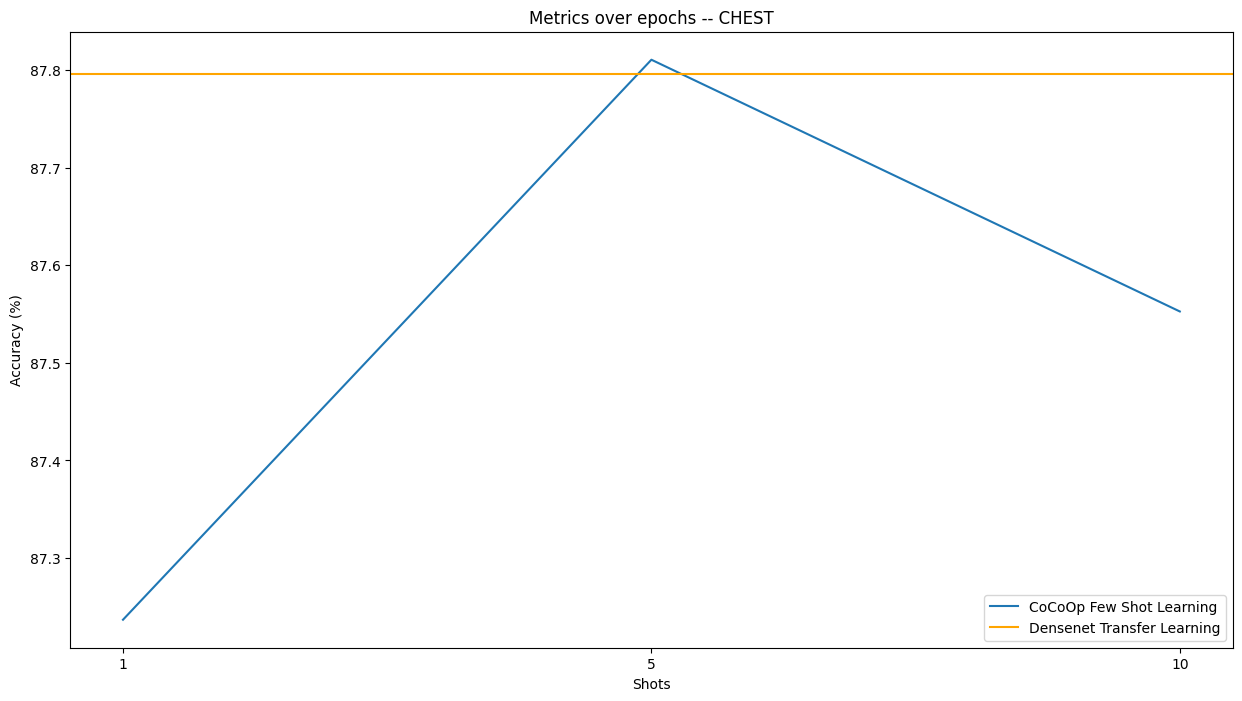

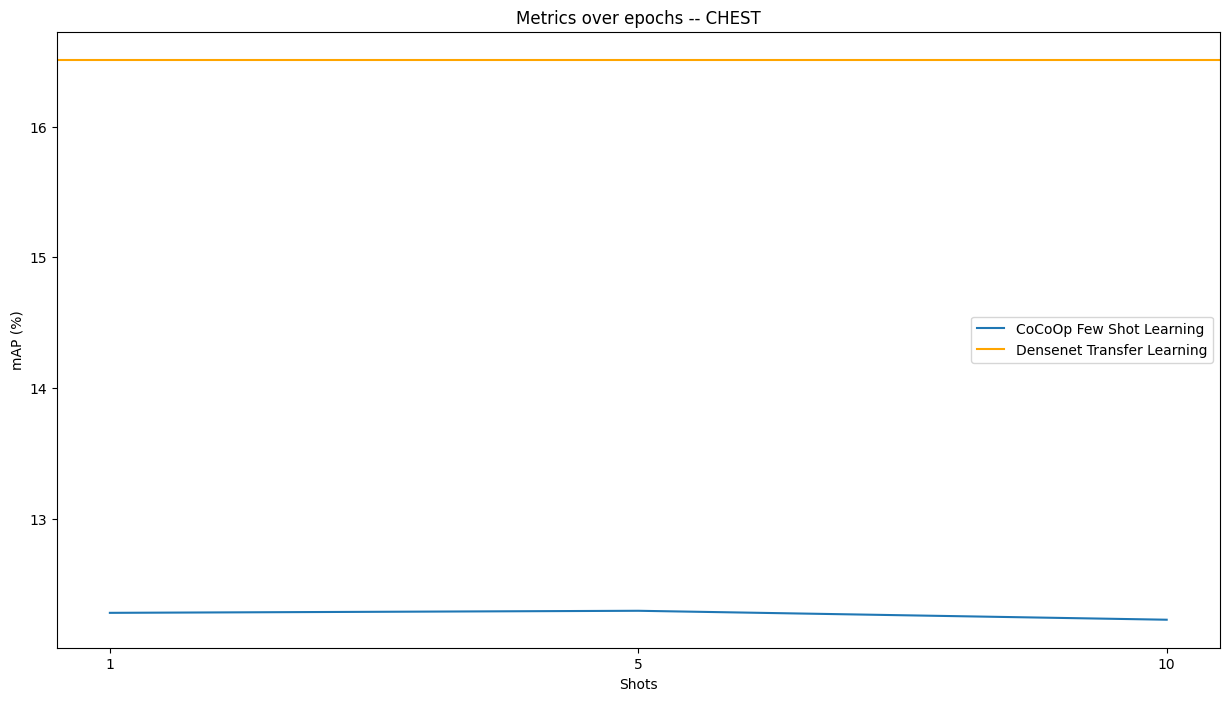

In [4]:
evaluate("chest")

3
shots_1_target_tumor * accuracy: 53.2%
 * mAP: 35.8%

shots_5_target_tumor * accuracy: 75.2%
 * mAP: 53.6%

shots_10_target_tumor * accuracy: 85.8%
 * mAP: 66.4%

{'1': 53.2, '5': 75.2, '10': 85.8}
{'1': 35.8, '5': 53.6, '10': 66.4}


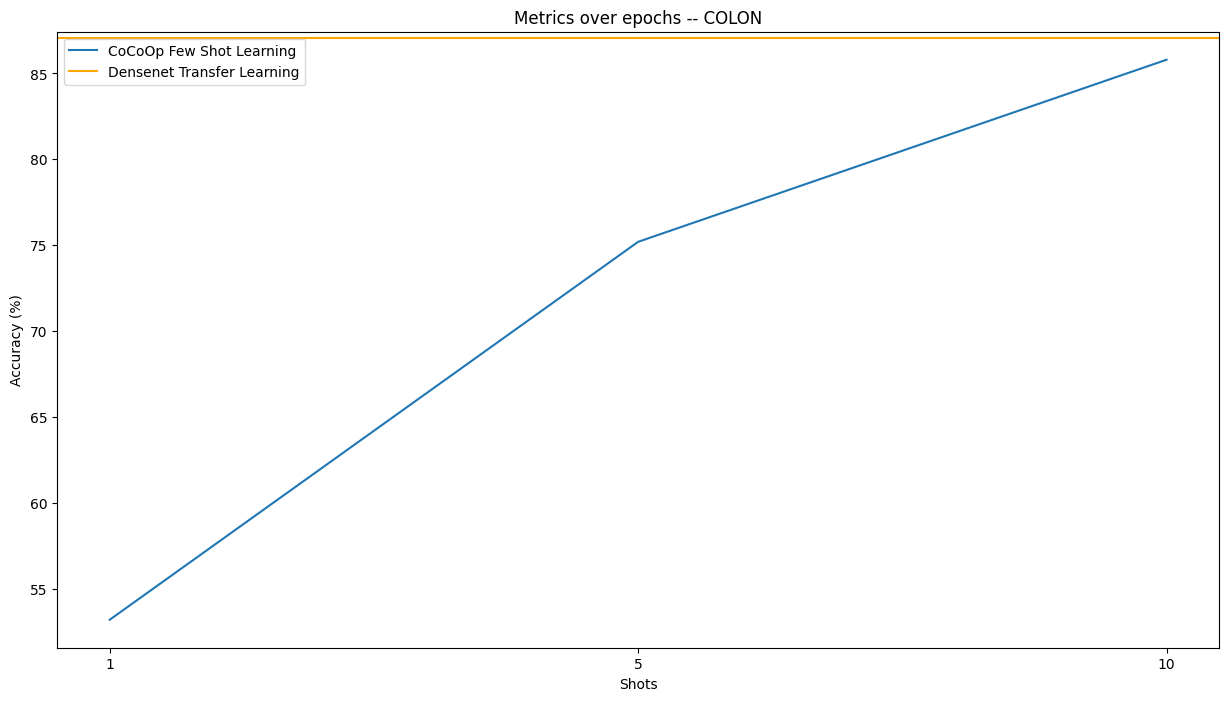

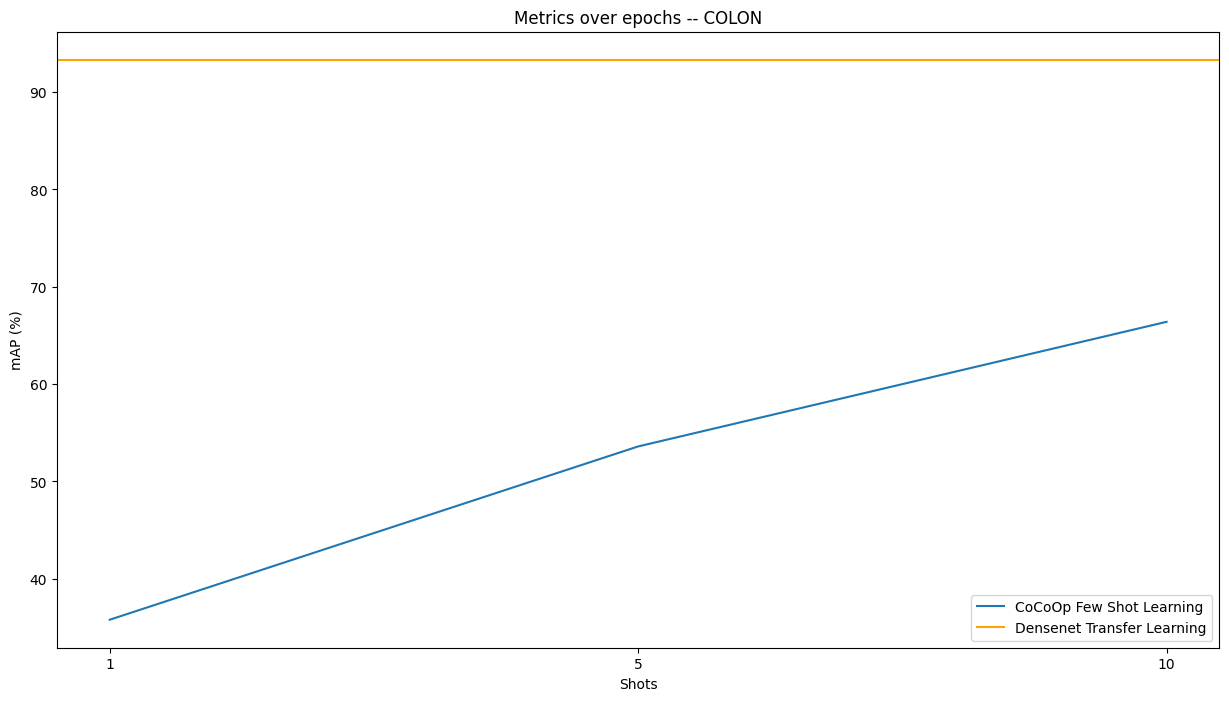

In [5]:
evaluate("colon")

12
shots_1_target_ulcer * accuracy: 22.2%
 * mAP: 22.2%

shots_5_target_ulcer * accuracy: 41.8%
 * mAP: 23.8%

shots_1_target_erosion * accuracy: 74.8%
 * mAP: 25.2%

shots_5_target_erosion * accuracy: 50.2%
 * mAP: 30.3%

shots_10_target_erosion * accuracy: 68.4%
 * mAP: 35.0%

shots_1_target_polyp * accuracy: 92.2%
 * mAP: 7.8%

shots_5_target_polyp * accuracy: 87.4%
 * mAP: 8.0%

shots_10_target_polyp * accuracy: 91.0%
 * mAP: 7.8%

shots_1_target_tumor * accuracy: 100.0%
 * mAP: -0.0%

shots_5_target_tumor * accuracy: 99.7%
 * mAP: -0.0%

shots_10_target_tumor * accuracy: 97.0%
 * mAP: -0.0%

shots_10_target_ulcer * accuracy: 62.4%
 * mAP: 27.9%

{'1': 72.3, '5': 69.775, '10': 79.69999999999999}
{'1': 13.799999999999999, '5': 15.525, '10': 17.674999999999997}


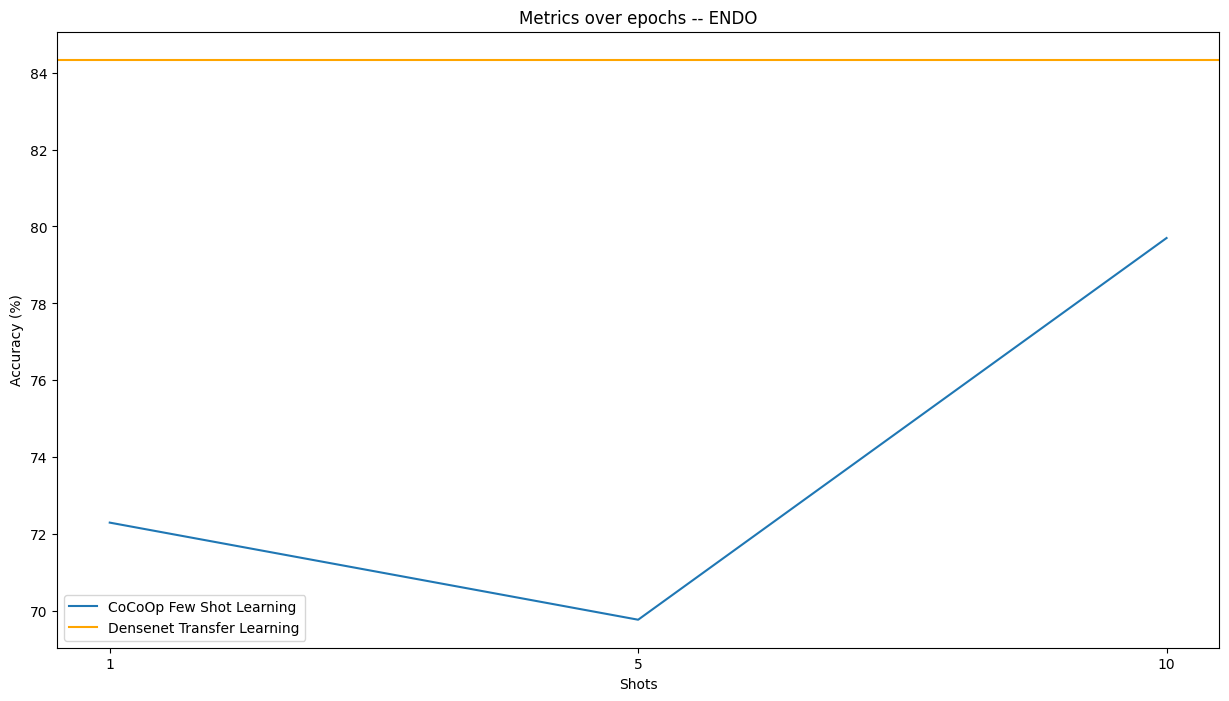

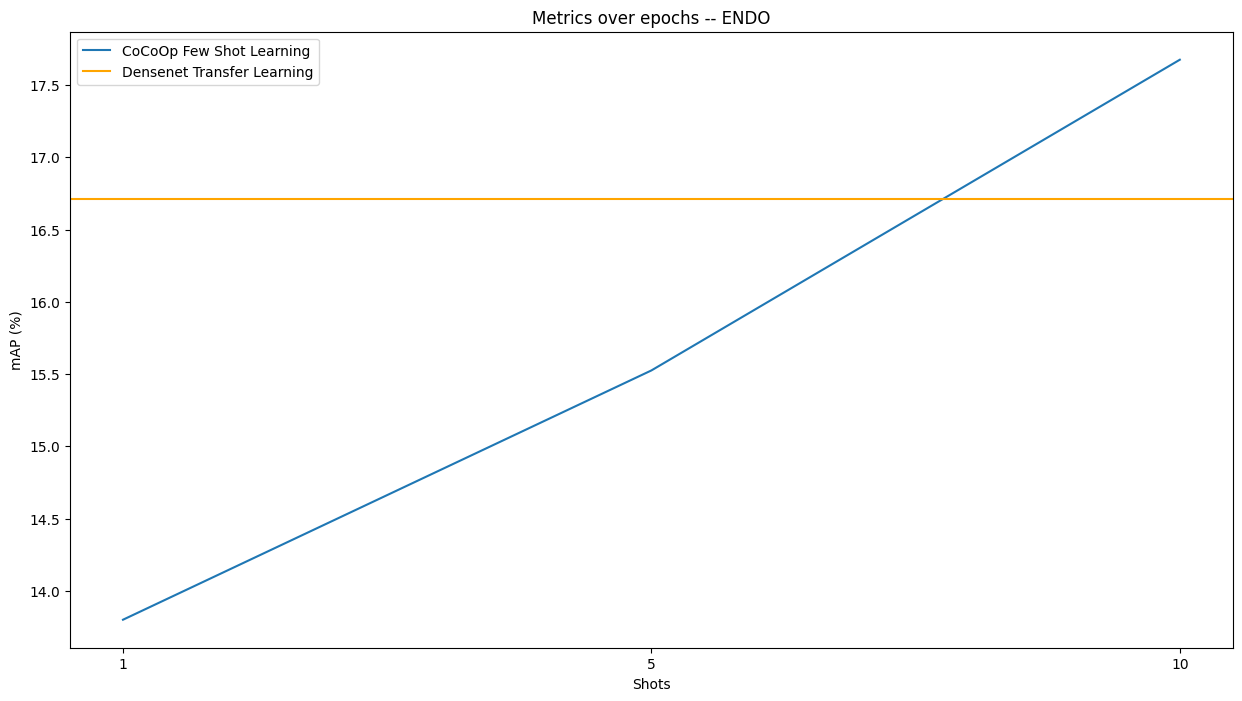

In [6]:
evaluate("endo")